In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from itertools import product

In [108]:
df = pd.read_csv('/Users/wafic/Downloads/data/my_say/User_Question_Answer.csv', low_memory=False)

In [109]:
df_q = pd.read_csv('/Users/wafic/Downloads/data/my_say/Questions_Answers.csv')

In [110]:
df.head()

,user_id,question_id,answer_id,datetimestamp
0,10109,21045,60570,2018-09-06 16:18:02
1,10135,21045,60571,2018-09-06 15:20:57
2,10237,21045,60571,2018-09-06 13:30:05
3,10261,21045,60570,2018-09-06 14:40:45
4,10268,21045,60571,2018-09-06 15:06:17


In [111]:
df_q.head(2)

,question_id,title,start_age,end_age,sex_id,category_id,nb_targets,nb_points,created_at,updated_at,topic_id,prefered_lang,rank,Total_Number_of_Answers,answer_id,description,Number_Of_Answers
0,21045,Are you trying to lose weight?,10,80,0.0,7,3000,1,2018-09-06 01:23:42,2018-09-06 15:12:03,0,0.0,0,3000,60570,Yes,1943
1,21045,Are you trying to lose weight?,10,80,0.0,7,3000,1,2018-09-06 01:23:42,2018-09-06 15:12:03,0,0.0,0,3000,60571,No,1057


In [112]:
df.shape

(512410, 4)

In [113]:
df_q = df_q[['category_id', 'question_id']]

In [114]:
df_q.drop_duplicates(inplace=True)

In [115]:
df = df.merge(df_q, on='question_id', how='left').copy()

In [116]:
len(df)

512410

In [117]:
df = df[(df.category_id == 1) | (df.category_id == 2) | (df.category_id == 3)].copy()

In [118]:
df.category_id.value_counts()

3.0    45192
1.0     4003
Name: category_id, dtype: int64

In [119]:
len(df)

49195

In [103]:
df = df[['user_id', 'answer_id']].copy()

In [104]:
df.head()

,user_id,answer_id
184207,10119,61750
184208,10135,61749
184209,10268,61752
184210,10270,61749
184211,10296,61752


In [105]:
matrix = pd.get_dummies(df,  'answer_id')

In [106]:
# matrix.drop('answer_id_2018-09-12 19:09:06', axis=1, inplace=True)

In [107]:
matrix.head()

,user_id,answer_id_61749,answer_id_61750,answer_id_61751,answer_id_61752,answer_id_61831,answer_id_61832,answer_id_61863,answer_id_61864,answer_id_61865,...,answer_id_62145,answer_id_62146,answer_id_62147,answer_id_62148,answer_id_62151,answer_id_62152,answer_id_62153,answer_id_62154,answer_id_62308,answer_id_62309
184207,10119,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184208,10135,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184209,10268,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184210,10270,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184211,10296,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
len(matrix)

115577

In [201]:
data = matrix.groupby('user_id')[matrix.columns[1:]].sum().reset_index()

In [202]:
data.head()

,user_id,answer_id_61749,answer_id_61750,answer_id_61751,answer_id_61752,answer_id_61831,answer_id_61832,answer_id_61863,answer_id_61864,answer_id_61865,...,answer_id_62145,answer_id_62146,answer_id_62147,answer_id_62148,answer_id_62151,answer_id_62152,answer_id_62153,answer_id_62154,answer_id_62308,answer_id_62309
0,89,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,0,0
3,10109,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,0,2
4,10119,0,4,0,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,0,0


In [151]:
len(data)

6172

In [152]:
data.set_index('user_id', inplace=True)

In [153]:
data.head(2)

,answer_id_61749,answer_id_61750,answer_id_61751,answer_id_61752,answer_id_61831,answer_id_61832,answer_id_61863,answer_id_61864,answer_id_61865,answer_id_61866,...,answer_id_62145,answer_id_62146,answer_id_62147,answer_id_62148,answer_id_62151,answer_id_62152,answer_id_62153,answer_id_62154,answer_id_62308,answer_id_62309
user_id,,,,,,,,,,,,,,,,,,,,,
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
data.shape

(6172, 42)

### Dendogram for 50 users

In [23]:
sub_data = data[:60].copy()

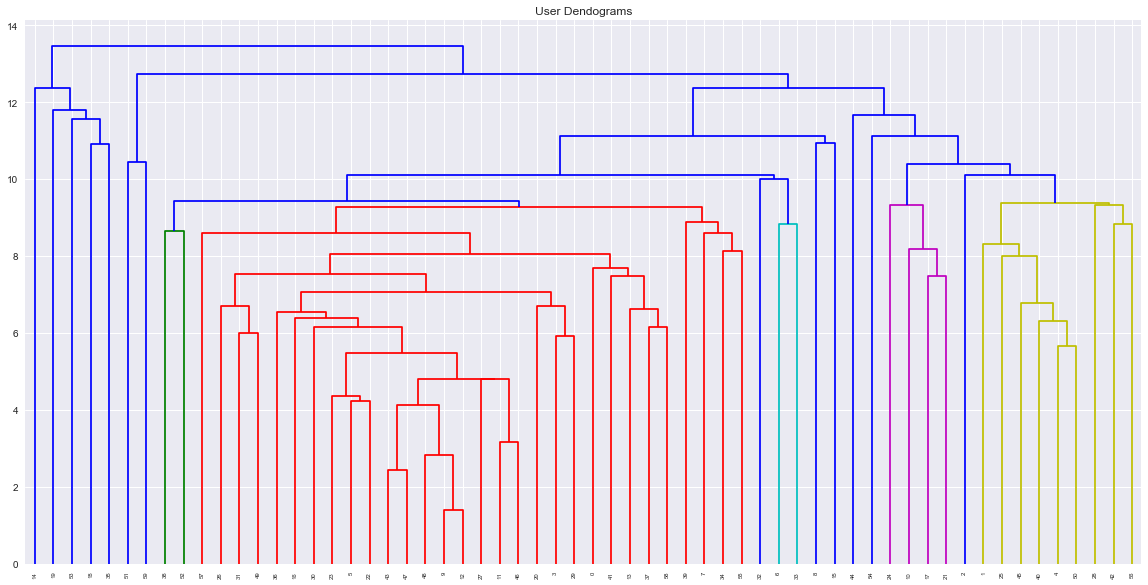

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 10))  
plt.title("User Dendograms")  
dend = shc.dendrogram(shc.linkage(sub_data, method='complete'))  

### Hierarchical Cluster

In [25]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [26]:
options = [30, 50]
for n_clus in options:
    cluster = AgglomerativeClustering(n_clusters=n_clus, linkage='average')
    labels = cluster.fit_predict(data)
    silhouette_avg = round(silhouette_score(data, labels), 3)
    print("For n_clusters", n_clus, "the average silhouette_score is: ", silhouette_avg)

For n_clusters 30 the average silhouette_score is:  0.174
For n_clusters 50 the average silhouette_score is:  0.166


In [22]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = labels

In [23]:
cluster_map.head(10)

,data_index,cluster
0,89,0
1,107,0
2,173,0
3,183,0
4,10109,0
5,10117,0
6,10119,0
7,10135,0
8,10237,0
9,10239,0


In [24]:
cluster_map.cluster.value_counts()

0     7095
23      14
6       10
7        7
11       7
9        6
21       5
34       5
2        5
24       4
12       4
40       4
1        4
46       4
14       3
8        3
37       3
4        3
10       3
45       3
18       3
30       3
42       3
3        3
13       2
35       2
16       2
20       2
32       2
19       2
48       2
15       2
22       2
5        2
17       2
38       2
49       2
25       1
29       1
33       1
44       1
36       1
41       1
28       1
27       1
43       1
31       1
26       1
39       1
47       1
Name: cluster, dtype: int64

### K-Mode Clustering

In [155]:
from kmodes.kmodes import KModes

In [156]:
len(data)

6172

In [157]:
np.random.seed(10000)
clusters_n = [3, 5, 8]

for num_clust in clusters_n:
    km = KModes(n_clusters=num_clust, init='Huang', n_init=5, verbose=1, max_iter=100)
    label_m = km.fit_predict(data)

    silhouette_avg = round(silhouette_score(data, label_m), 3)
    print("For n_clusters", num_clust, "the average silhouette_score is: ", silhouette_avg)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1062, cost: 41128.0
Run 1, iteration: 2/100, moves: 0, cost: 41128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2439, cost: 40390.0
Run 2, iteration: 2/100, moves: 1482, cost: 39857.0
Run 2, iteration: 3/100, moves: 178, cost: 39857.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1446, cost: 41672.0
Run 3, iteration: 2/100, moves: 781, cost: 41672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2427, cost: 39652.0
Run 4, iteration: 2/100, moves: 4, cost: 39652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 750, cost: 41837.0
Run 5, iteration: 2/100, moves: 41, cost: 41837.0
Best run was number 4
For n_clusters 3 

In [40]:
np.random.seed(10000)
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, max_iter=100)
label_m = km.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1062, cost: 41128.0
Run 1, iteration: 2/100, moves: 0, cost: 41128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2439, cost: 40390.0
Run 2, iteration: 2/100, moves: 1482, cost: 39857.0
Run 2, iteration: 3/100, moves: 178, cost: 39857.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1446, cost: 41672.0
Run 3, iteration: 2/100, moves: 781, cost: 41672.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2427, cost: 39652.0
Run 4, iteration: 2/100, moves: 4, cost: 39652.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 750, cost: 41837.0
Run 5, iteration: 2/100, moves: 41, cost: 41837.0
Best run was number 4


In [41]:
k_map = pd.DataFrame()
k_map['data_index'] = data.index.values
k_map['cluster'] = label_m

In [42]:
k_map.cluster.value_counts()

0    2540
2    1869
1    1763
Name: cluster, dtype: int64

In [45]:
k_map.head(20)

,data_index,cluster
0,89,1
1,107,1
2,173,1
3,10109,2
4,10119,2
5,10135,1
6,10237,2
7,10245,2
8,10264,1
9,10268,2


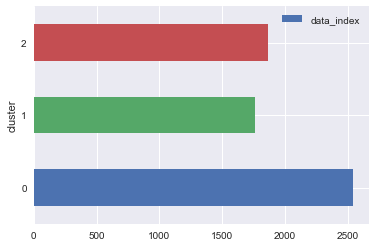

In [46]:
k_map.groupby('cluster')[['data_index']].count().reset_index().plot('cluster', 'data_index', kind='barh')

In [122]:
len(df)

49195

In [124]:
df.merge(k_map, left_on='user_id', right_on='data_index', how='right').to_csv('Cluster_1.csv')

In [180]:
len(k_map)

6172

In [63]:
len(df)

115577

In [64]:
df

,user_id,question_id,answer_id,datetimestamp,category_id
564574,10119,21494,61750,2018-09-14 13:22:39,3
564575,10119,21494,61750,2018-09-14 13:22:39,3
564576,10119,21494,61750,2018-09-14 13:22:39,3
564577,10119,21494,61750,2018-09-14 13:22:39,3
564578,10135,21494,61749,2018-09-14 14:49:15,3
564579,10135,21494,61749,2018-09-14 14:49:15,3
564580,10135,21494,61749,2018-09-14 14:49:15,3
564581,10135,21494,61749,2018-09-14 14:49:15,3
564582,10268,21494,61752,2018-09-14 13:55:45,3
564583,10268,21494,61752,2018-09-14 13:55:45,3
